Loading dataset...
Dataset loaded successfully: (50000, 6)
Starting Comprehensive EDA Analysis...

DATASET OVERVIEW
Dataset Shape: (50000, 6)
Date Range: 2021-01-01 00:00:00 to 2021-03-07 23:57:00
Number of Unique Meters: 2
Total Records: 50000

Column Information:
t_kWh                   float64
z_Avg Voltage (Volt)    float64
z_Avg Current (Amp)     float64
y_Freq (Hz)             float64
meter                    object
carbon_emissions        float64
dtype: object

Missing Values:
Series([], dtype: int64)

Basic Statistics:
              t_kWh  z_Avg Voltage (Volt)  z_Avg Current (Amp)   y_Freq (Hz)  \
count  50000.000000          50000.000000         50000.000000  50000.000000   
mean       0.011627            242.820886             1.148827     48.799523   
std        0.017854             38.820076             1.506180      7.656001   
min        0.000000              0.000000             0.000000      0.000000   
25%        0.003000            243.660000             0.260000     

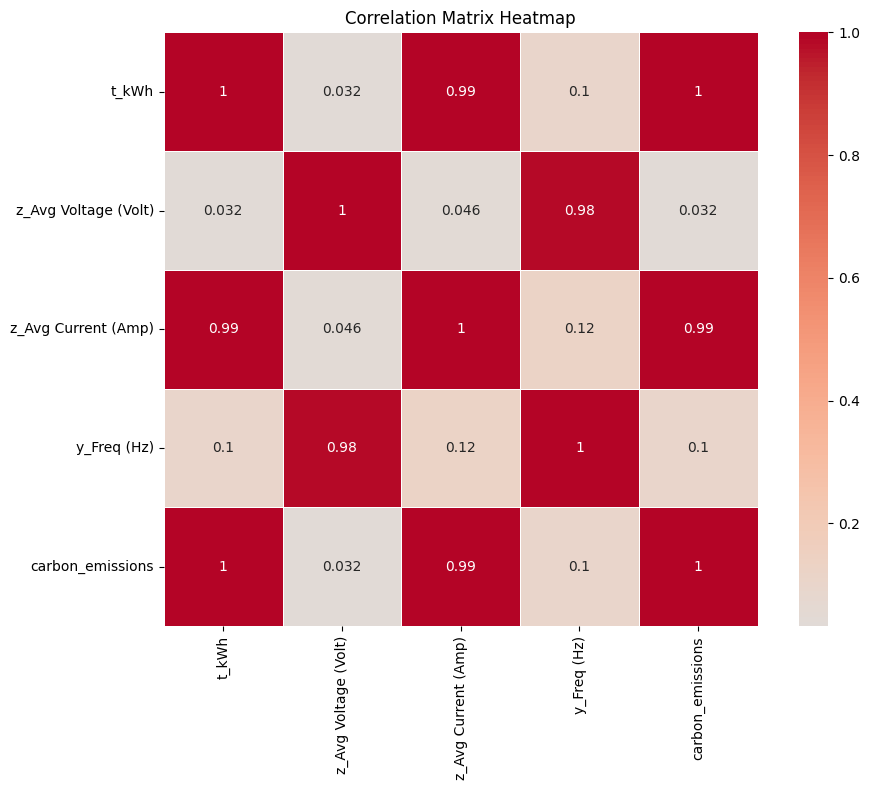


Key Correlation Insights:
- t_kWh vs z_Avg Current (Amp): 0.989
- t_kWh vs carbon_emissions: 1.000
- z_Avg Voltage (Volt) vs y_Freq (Hz): 0.981
- z_Avg Current (Amp) vs carbon_emissions: 0.989

DISTRIBUTION ANALYSIS


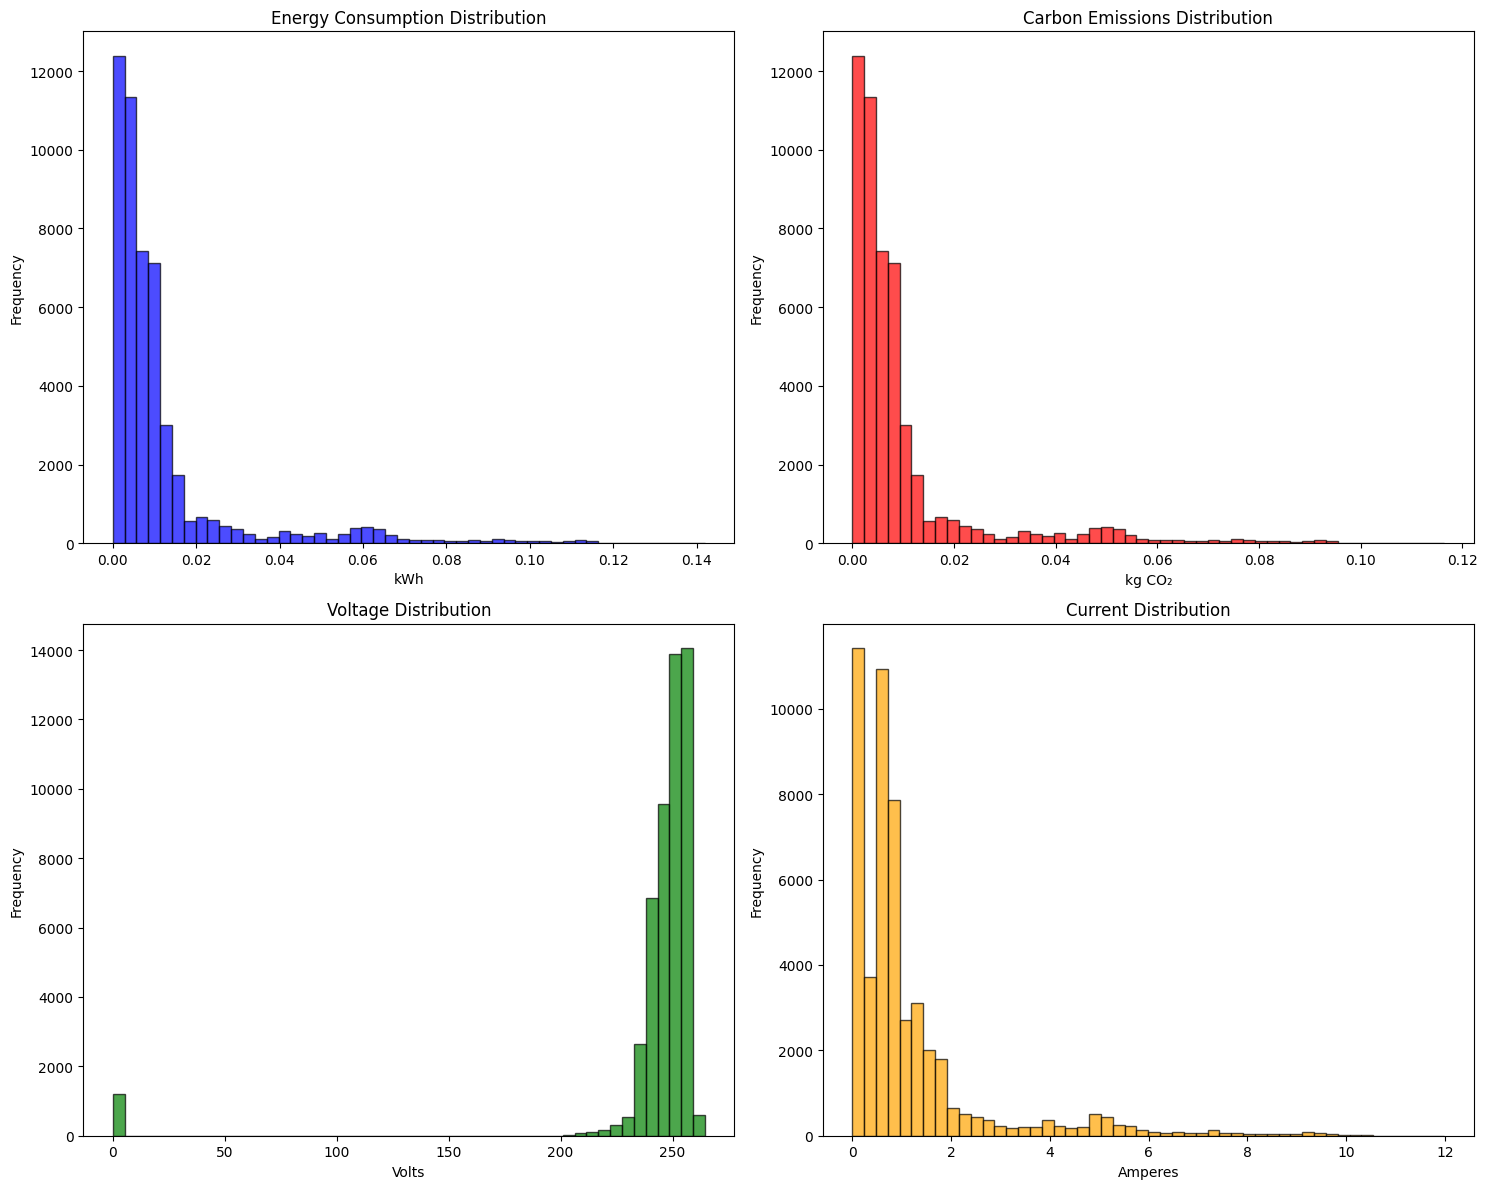

Distribution Statistics:
t_kWh: Skewness=3.163, Kurtosis=10.984
carbon_emissions: Skewness=3.163, Kurtosis=10.984
z_Avg Voltage (Volt): Skewness=-5.873, Kurtosis=33.815
z_Avg Current (Amp): Skewness=2.938, Kurtosis=9.807

TIME SERIES ANALYSIS


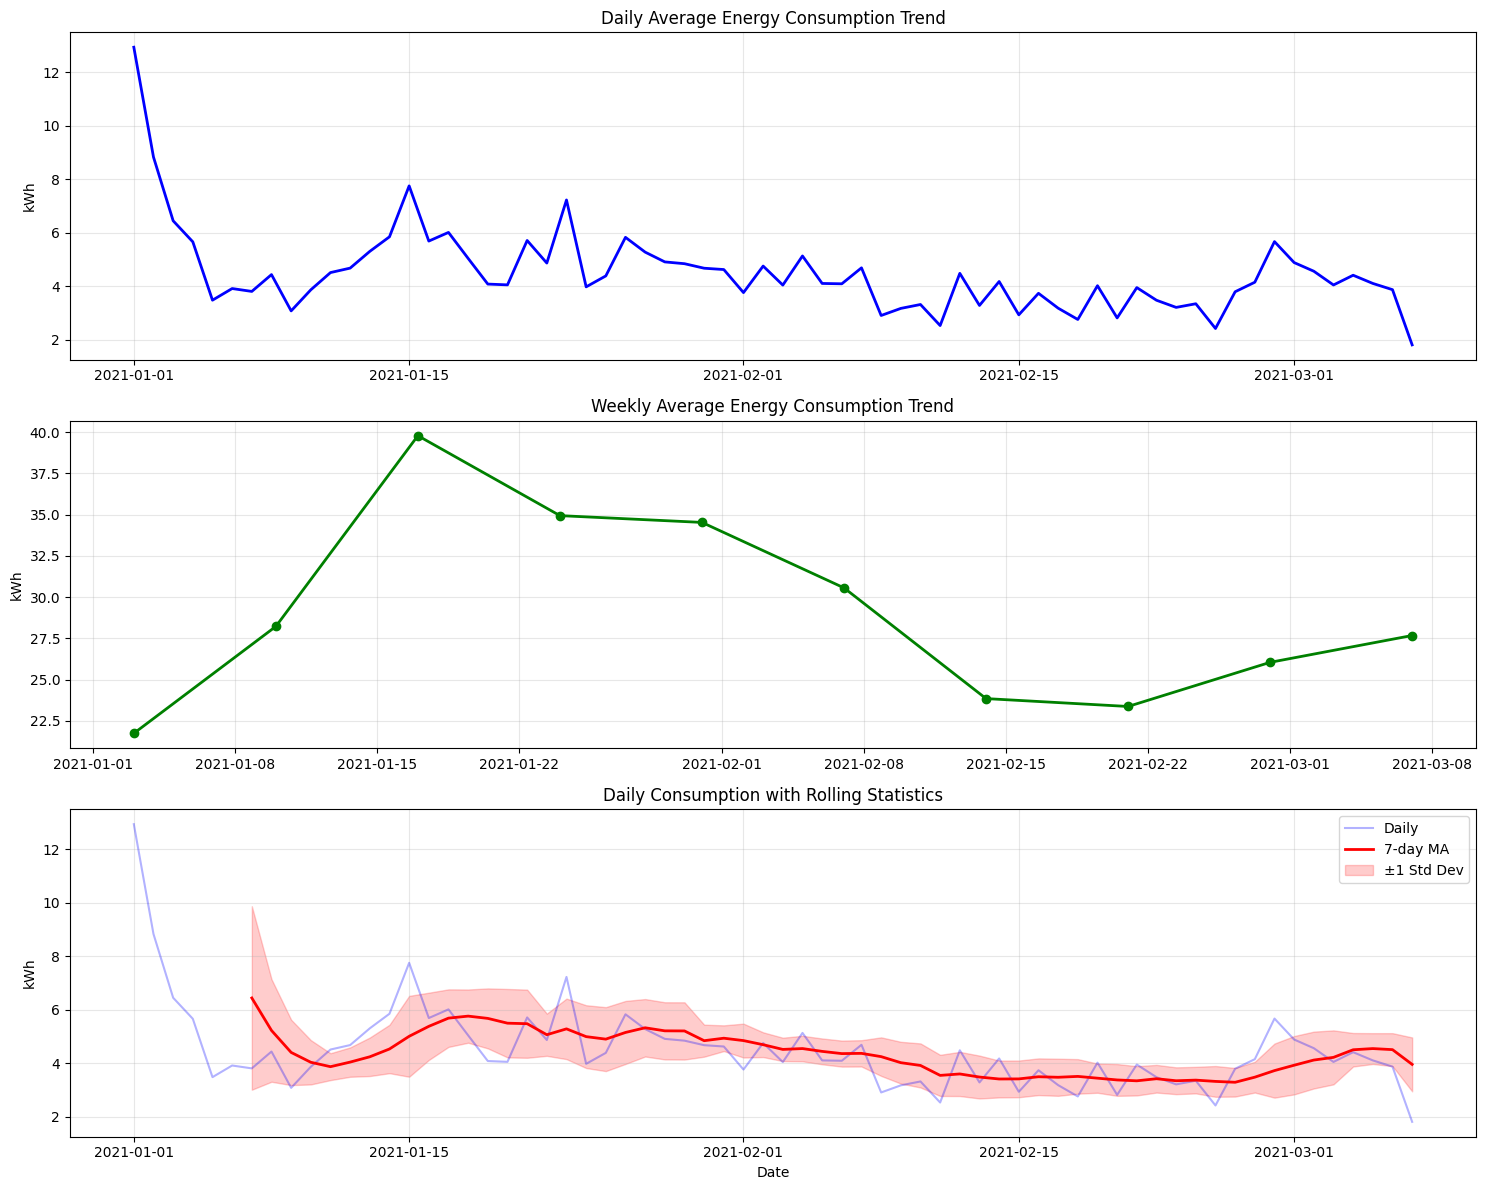

Seasonal Patterns:
Peak hour: 11:00 (0.023 kWh)
Peak day: Sun (0.013 kWh)
Peak month: 1 (0.017 kWh)

ANOMALY DETECTION
Anomalies detected (Z-score > 3): 1385
Anomalies detected (IQR method): 5565


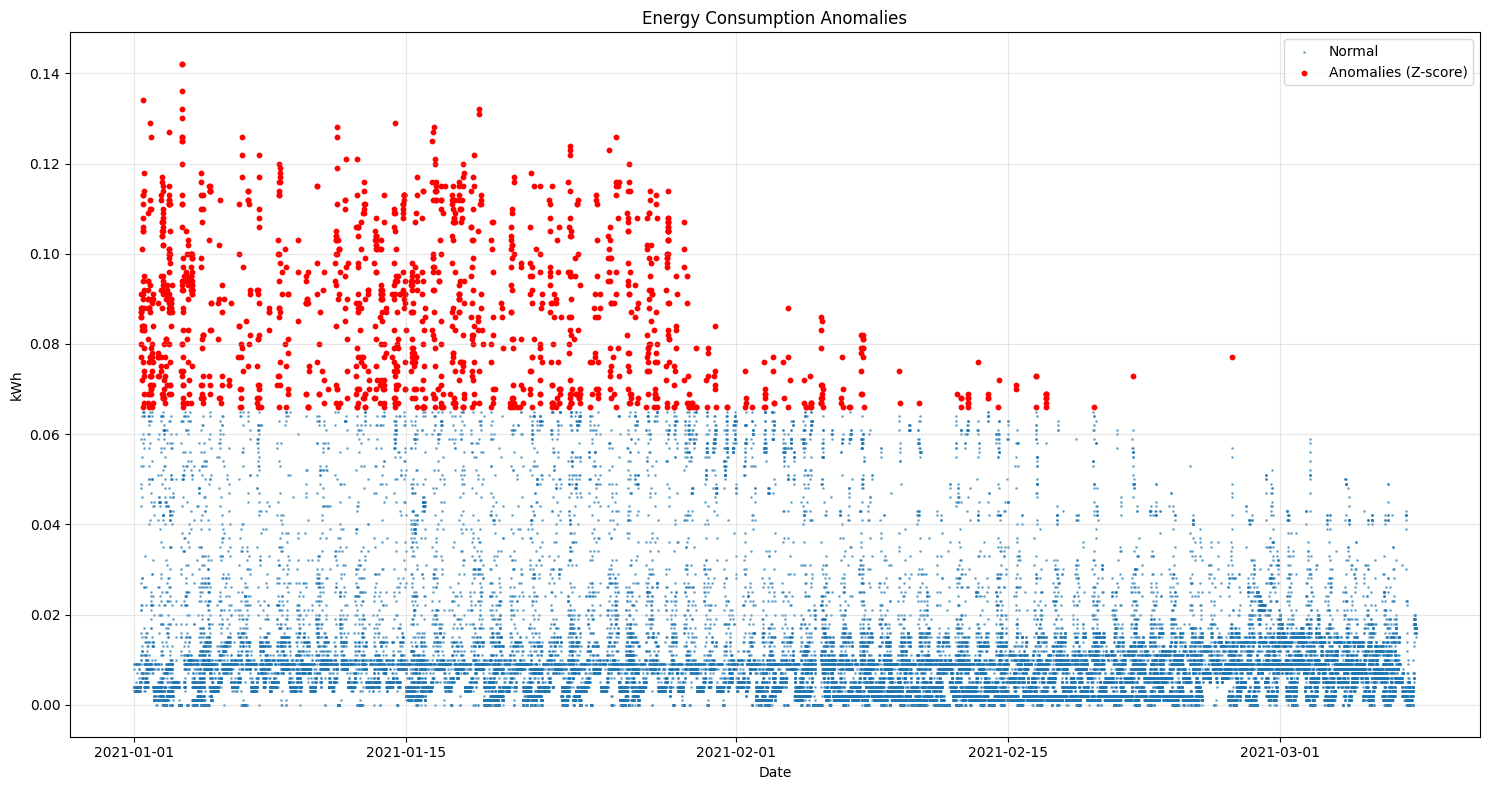


Top 5 Anomalies:
- 2021-01-03 10:54:00: 0.142 kWh (Meter: BR04)
- 2021-01-03 11:24:00: 0.142 kWh (Meter: BR04)
- 2021-01-03 10:51:00: 0.136 kWh (Meter: BR04)
- 2021-01-01 11:33:00: 0.134 kWh (Meter: BR04)
- 2021-01-03 11:27:00: 0.132 kWh (Meter: BR04)

METER COMPARISON ANALYSIS
Meter Statistics:
         t_kWh                      carbon_emissions z_Avg Voltage (Volt)  \
           sum   mean    std  count              sum                 mean   
meter                                                                       
BR02    86.909  0.005  0.008  18720           71.265              242.111   
BR04   494.433  0.016  0.021  31280          405.435              243.246   

      z_Avg Current (Amp)  
                     mean  
meter                      
BR02                0.480  
BR04                1.549  


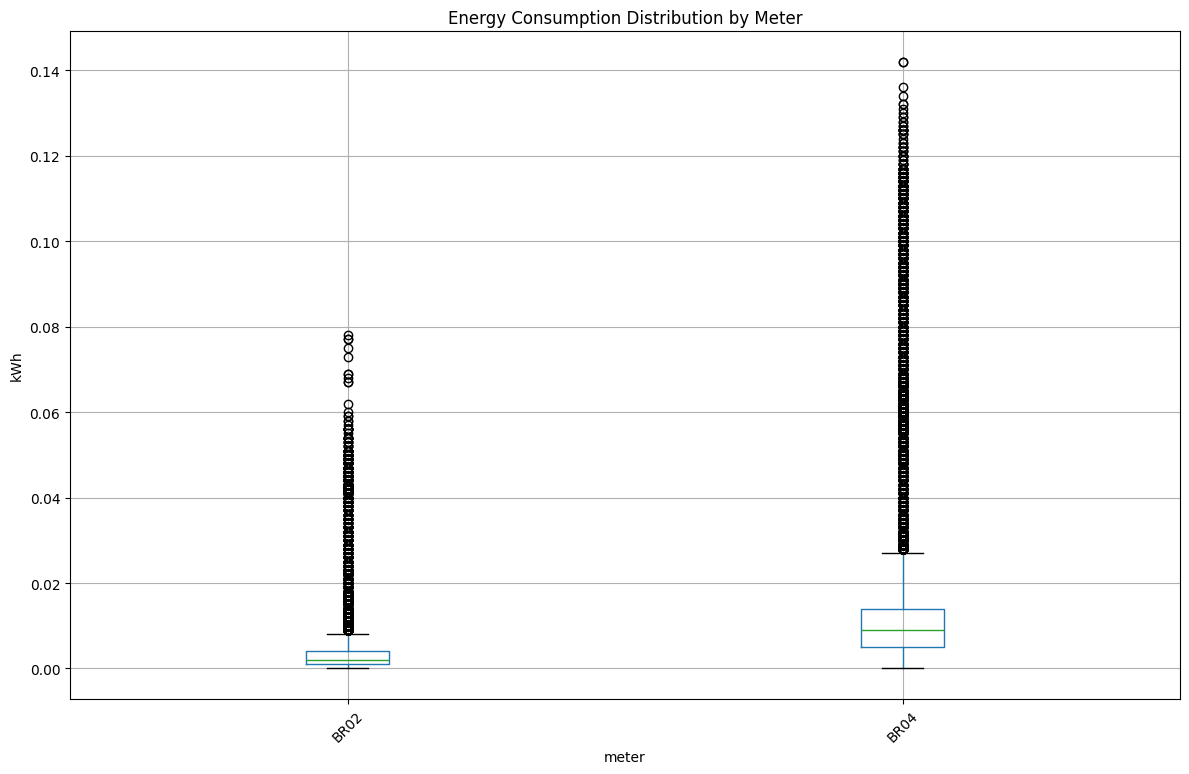


Most Efficient Meter: BR02 (0.005 kWh avg)
Least Efficient Meter: BR04 (0.016 kWh avg)

KEY INSIGHTS & RECOMMENDATIONS
Generated Insights:
1. Peak energy usage occurs at 11:00 with 0.02 kWh average
2. Highest consumption day is Sunday with 0.01 kWh average
3. Average daily carbon footprint: 7.22 kg CO₂
4. High consumption variability detected - consider load balancing strategies

EDA ANALYSIS COMPLETE
All visualizations saved to 'static/images/' directory


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

class EDAAnalysis:
    def __init__(self, data_path='data/total_dataset.csv'):
        self.data_path = data_path
        self.df = None
        self.load_and_preprocess()
    
    def load_and_preprocess(self):
        """Load and preprocess the dataset"""
        print("Loading dataset...")
        self.df = pd.read_csv(self.data_path, nrows=50000)
        
        # Convert timestamp
        self.df['x_Timestamp'] = pd.to_datetime(self.df['x_Timestamp'])
        self.df.set_index('x_Timestamp', inplace=True)
        
        # Add carbon emissions
        self.df['carbon_emissions'] = self.df['t_kWh'] * 0.82
        
        # Handle missing values
        self.df['t_kWh'].fillna(self.df['t_kWh'].median(), inplace=True)
        self.df['z_Avg Voltage (Volt)'].fillna(self.df['z_Avg Voltage (Volt)'].mean(), inplace=True)
        self.df['z_Avg Current (Amp)'].fillna(self.df['z_Avg Current (Amp)'].mean(), inplace=True)
        self.df['y_Freq (Hz)'].fillna(self.df['y_Freq (Hz)'].mean(), inplace=True)
        
        print(f"Dataset loaded successfully: {self.df.shape}")
    
    def dataset_overview(self):
        """Generate comprehensive dataset overview"""
        print("\n" + "="*60)
        print("DATASET OVERVIEW")
        print("="*60)
        
        print(f"Dataset Shape: {self.df.shape}")
        print(f"Date Range: {self.df.index.min()} to {self.df.index.max()}")
        print(f"Number of Unique Meters: {self.df['meter'].nunique()}")
        print(f"Total Records: {len(self.df)}")
        
        print("\nColumn Information:")
        print(self.df.dtypes)
        
        print("\nMissing Values:")
        missing = self.df.isnull().sum()
        print(missing[missing > 0])
        
        print("\nBasic Statistics:")
        print(self.df.describe())
        
        print(f"\nTotal Energy Consumption: {self.df['t_kWh'].sum():.2f} kWh")
        print(f"Total Carbon Emissions: {self.df['carbon_emissions'].sum():.2f} kg CO₂")
        print(f"Average Daily Consumption per Meter: {self.df.groupby('meter')['t_kWh'].sum().mean():.2f} kWh")
    
    def correlation_analysis(self):
        """Analyze correlations between variables"""
        print("\n" + "="*60)
        print("CORRELATION ANALYSIS")
        print("="*60)
        
        # Calculate correlation matrix
        numeric_cols = ['t_kWh', 'z_Avg Voltage (Volt)', 'z_Avg Current (Amp)', 'y_Freq (Hz)', 'carbon_emissions']
        corr_matrix = self.df[numeric_cols].corr()
        
        print("Correlation Matrix:")
        print(corr_matrix.round(3))
        
        # Create correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, linewidths=0.5)
        plt.title('Correlation Matrix Heatmap')
        plt.tight_layout()
        plt.savefig('static/images/correlation_heatmap.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Key insights
        print("\nKey Correlation Insights:")
        strong_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.5:
                    strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
        
        for var1, var2, corr in strong_corr:
            print(f"- {var1} vs {var2}: {corr:.3f}")
    
    def distribution_analysis(self):
        """Analyze distributions of key variables"""
        print("\n" + "="*60)
        print("DISTRIBUTION ANALYSIS")
        print("="*60)
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Energy consumption distribution
        axes[0, 0].hist(self.df['t_kWh'], bins=50, alpha=0.7, color='blue', edgecolor='black')
        axes[0, 0].set_title('Energy Consumption Distribution')
        axes[0, 0].set_xlabel('kWh')
        axes[0, 0].set_ylabel('Frequency')
        
        # Carbon emissions distribution
        axes[0, 1].hist(self.df['carbon_emissions'], bins=50, alpha=0.7, color='red', edgecolor='black')
        axes[0, 1].set_title('Carbon Emissions Distribution')
        axes[0, 1].set_xlabel('kg CO₂')
        axes[0, 1].set_ylabel('Frequency')
        
        # Voltage distribution
        axes[1, 0].hist(self.df['z_Avg Voltage (Volt)'], bins=50, alpha=0.7, color='green', edgecolor='black')
        axes[1, 0].set_title('Voltage Distribution')
        axes[1, 0].set_xlabel('Volts')
        axes[1, 0].set_ylabel('Frequency')
        
        # Current distribution
        axes[1, 1].hist(self.df['z_Avg Current (Amp)'], bins=50, alpha=0.7, color='orange', edgecolor='black')
        axes[1, 1].set_title('Current Distribution')
        axes[1, 1].set_xlabel('Amperes')
        axes[1, 1].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.savefig('static/images/distributions.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Statistical insights
        print("Distribution Statistics:")
        for col in ['t_kWh', 'carbon_emissions', 'z_Avg Voltage (Volt)', 'z_Avg Current (Amp)']:
            skewness = self.df[col].skew()
            kurtosis = self.df[col].kurtosis()
            print(f"{col}: Skewness={skewness:.3f}, Kurtosis={kurtosis:.3f}")
    
    def time_series_analysis(self):
        """Analyze time series patterns"""
        print("\n" + "="*60)
        print("TIME SERIES ANALYSIS")
        print("="*60)
        
        # Resample to different time periods
        hourly_data = self.df.groupby('meter').resample('H')['t_kWh'].sum().reset_index()
        daily_data = self.df.groupby('meter').resample('D')['t_kWh'].sum().reset_index()
        weekly_data = self.df.groupby('meter').resample('W')['t_kWh'].sum().reset_index()
        
        # Create time series plots
        fig, axes = plt.subplots(3, 1, figsize=(15, 12))
        
        # Daily consumption trend
        daily_avg = daily_data.groupby('x_Timestamp')['t_kWh'].mean()
        axes[0].plot(daily_avg.index, daily_avg.values, linewidth=2, color='blue')
        axes[0].set_title('Daily Average Energy Consumption Trend')
        axes[0].set_ylabel('kWh')
        axes[0].grid(True, alpha=0.3)
        
        # Weekly consumption trend
        weekly_avg = weekly_data.groupby('x_Timestamp')['t_kWh'].mean()
        axes[1].plot(weekly_avg.index, weekly_avg.values, linewidth=2, color='green', marker='o')
        axes[1].set_title('Weekly Average Energy Consumption Trend')
        axes[1].set_ylabel('kWh')
        axes[1].grid(True, alpha=0.3)
        
        # Rolling statistics
        daily_avg_rolling = daily_avg.rolling(window=7).mean()
        daily_std_rolling = daily_avg.rolling(window=7).std()
        
        axes[2].plot(daily_avg.index, daily_avg.values, alpha=0.3, color='blue', label='Daily')
        axes[2].plot(daily_avg_rolling.index, daily_avg_rolling.values, linewidth=2, color='red', label='7-day MA')
        axes[2].fill_between(daily_avg_rolling.index, 
                           daily_avg_rolling - daily_std_rolling,
                           daily_avg_rolling + daily_std_rolling,
                           alpha=0.2, color='red', label='±1 Std Dev')
        axes[2].set_title('Daily Consumption with Rolling Statistics')
        axes[2].set_ylabel('kWh')
        axes[2].set_xlabel('Date')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('static/images/time_series.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Seasonal patterns
        print("Seasonal Patterns:")
        hourly_pattern = self.df.groupby(self.df.index.hour)['t_kWh'].mean()
        daily_pattern = self.df.groupby(self.df.index.dayofweek)['t_kWh'].mean()
        monthly_pattern = self.df.groupby(self.df.index.month)['t_kWh'].mean()
        
        print(f"Peak hour: {hourly_pattern.idxmax()}:00 ({hourly_pattern.max():.3f} kWh)")
        print(f"Peak day: {['Mon','Tue','Wed','Thu','Fri','Sat','Sun'][daily_pattern.idxmax()]} ({daily_pattern.max():.3f} kWh)")
        print(f"Peak month: {monthly_pattern.idxmax()} ({monthly_pattern.max():.3f} kWh)")
    
    def anomaly_detection(self):
        """Detect anomalies in energy consumption"""
        print("\n" + "="*60)
        print("ANOMALY DETECTION")
        print("="*60)
        
        # Z-score method
        z_scores = np.abs((self.df['t_kWh'] - self.df['t_kWh'].mean()) / self.df['t_kWh'].std())
        anomalies_zscore = self.df[z_scores > 3]
        
        # IQR method
        Q1 = self.df['t_kWh'].quantile(0.25)
        Q3 = self.df['t_kWh'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        anomalies_iqr = self.df[(self.df['t_kWh'] < lower_bound) | (self.df['t_kWh'] > upper_bound)]
        
        print(f"Anomalies detected (Z-score > 3): {len(anomalies_zscore)}")
        print(f"Anomalies detected (IQR method): {len(anomalies_iqr)}")
        
        # Plot anomalies
        plt.figure(figsize=(15, 8))
        plt.scatter(self.df.index, self.df['t_kWh'], alpha=0.5, s=1, label='Normal')
        plt.scatter(anomalies_zscore.index, anomalies_zscore['t_kWh'], 
                   color='red', s=10, label='Anomalies (Z-score)')
        plt.title('Energy Consumption Anomalies')
        plt.xlabel('Date')
        plt.ylabel('kWh')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('static/images/anomalies.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        if len(anomalies_zscore) > 0:
            print("\nTop 5 Anomalies:")
            top_anomalies = anomalies_zscore.nlargest(5, 't_kWh')
            for idx, row in top_anomalies.iterrows():
                print(f"- {idx}: {row['t_kWh']:.3f} kWh (Meter: {row['meter']})")
    
    def meter_comparison(self):
        """Compare consumption across different meters"""
        print("\n" + "="*60)
        print("METER COMPARISON ANALYSIS")
        print("="*60)
        
        # Aggregate by meter
        meter_stats = self.df.groupby('meter').agg({
            't_kWh': ['sum', 'mean', 'std', 'count'],
            'carbon_emissions': 'sum',
            'z_Avg Voltage (Volt)': 'mean',
            'z_Avg Current (Amp)': 'mean'
        }).round(3)
        
        print("Meter Statistics:")
        print(meter_stats)
        
        # Box plot comparison
        plt.figure(figsize=(12, 8))
        self.df.boxplot(column='t_kWh', by='meter', ax=plt.gca())
        plt.title('Energy Consumption Distribution by Meter')
        plt.suptitle('')  # Remove automatic title
        plt.ylabel('kWh')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('static/images/meter_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Efficiency ranking
        meter_efficiency = self.df.groupby('meter')['t_kWh'].mean().sort_values()
        print(f"\nMost Efficient Meter: {meter_efficiency.index[0]} ({meter_efficiency.iloc[0]:.3f} kWh avg)")
        print(f"Least Efficient Meter: {meter_efficiency.index[-1]} ({meter_efficiency.iloc[-1]:.3f} kWh avg)")
    
    def generate_insights(self):
        """Generate automated insights from the analysis"""
        print("\n" + "="*60)
        print("KEY INSIGHTS & RECOMMENDATIONS")
        print("="*60)
        
        insights = []
        
        # Peak usage insights
        hourly_avg = self.df.groupby(self.df.index.hour)['t_kWh'].mean()
        peak_hour = hourly_avg.idxmax()
        insights.append(f"Peak energy usage occurs at {peak_hour}:00 with {hourly_avg.max():.2f} kWh average")
        
        # Weekly patterns
        daily_avg = self.df.groupby(self.df.index.dayofweek)['t_kWh'].mean()
        peak_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][daily_avg.idxmax()]
        insights.append(f"Highest consumption day is {peak_day} with {daily_avg.max():.2f} kWh average")
        
        # Efficiency insights
        avg_voltage = self.df['z_Avg Voltage (Volt)'].mean()
        if avg_voltage < 220:
            insights.append("Voltage levels are below optimal (220V), indicating potential inefficiency")
        
        # Carbon footprint
        total_emissions = self.df['carbon_emissions'].sum()
        daily_emissions = total_emissions / len(pd.Series(self.df.index.date).unique())
        insights.append(f"Average daily carbon footprint: {daily_emissions:.2f} kg CO₂")
        
        # Variability insights
        consumption_cv = self.df['t_kWh'].std() / self.df['t_kWh'].mean()
        if consumption_cv > 0.5:
            insights.append("High consumption variability detected - consider load balancing strategies")
        
        # Meter efficiency
        meter_efficiency = self.df.groupby('meter')['t_kWh'].mean()
        efficiency_range = meter_efficiency.max() - meter_efficiency.min()
        if efficiency_range > 2:
            insights.append(f"Significant efficiency gap between meters: {efficiency_range:.2f} kWh difference")
        
        print("Generated Insights:")
        for i, insight in enumerate(insights, 1):
            print(f"{i}. {insight}")
        
        return insights
    
    def run_complete_analysis(self):
        """Run the complete EDA analysis"""
        print("Starting Comprehensive EDA Analysis...")
        
        # Create output directory for images
        import os
        os.makedirs('static/images', exist_ok=True)
        
        # Run all analyses
        self.dataset_overview()
        self.correlation_analysis()
        self.distribution_analysis()
        self.time_series_analysis()
        self.anomaly_detection()
        self.meter_comparison()
        insights = self.generate_insights()
        
        print("\n" + "="*60)
        print("EDA ANALYSIS COMPLETE")
        print("="*60)
        print("All visualizations saved to 'static/images/' directory")
        
        return insights

if __name__ == "__main__":
    # Run the EDA analysis
    eda = EDAAnalysis()
    eda.run_complete_analysis()